In [1]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [2]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
%cd /content/gdrive/MyDrive/Colab Notebooks/COVID_Project

/content/gdrive/MyDrive/Colab Notebooks/COVID_Project


In [4]:
import numpy as np # linear algebra
import pandas as pd

# paths to covid and normal images
covid = '/content/gdrive/MyDrive/Colab Notebooks/COVID_Project/COVID-19_Radiography_Dataset/COVID/images'
normal = '/content/gdrive/MyDrive/Colab Notebooks/COVID_Project/COVID-19_Radiography_Dataset/Normal/images'

In [5]:
import os
# len covid images
len(os.listdir(covid))

3616

In [6]:
# len normal images
len(os.listdir(normal))

10192

In [7]:
filenames = os.listdir(covid) + os.listdir(normal)[0:3616] 
len(filenames)

7232

In [8]:
categories = []
for filename in filenames:
    category = filename.split('-')[0]
    if category == 'COVID':
        categories.append(str(1))
    elif category == 'Normal':
        categories.append(str(0))

In [9]:
# creating dataframe form the filenames and the category
for i in range(len(filenames)):
    if 'COVID' in filenames[i]:
        filenames[i] = os.path.join(covid, filenames[i])
    elif 'Normal' in filenames[i]:
        filenames[i] = os.path.join(normal, filenames[i])

In [10]:
df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [11]:
df.head()

,filename,category
0,/content/gdrive/MyDrive/Colab Notebooks/COVID_...,1
1,/content/gdrive/MyDrive/Colab Notebooks/COVID_...,1
2,/content/gdrive/MyDrive/Colab Notebooks/COVID_...,1
3,/content/gdrive/MyDrive/Colab Notebooks/COVID_...,1
4,/content/gdrive/MyDrive/Colab Notebooks/COVID_...,1


In [12]:
import seaborn as sns 
import matplotlib.pyplot as plt 
plt.style.use("seaborn")

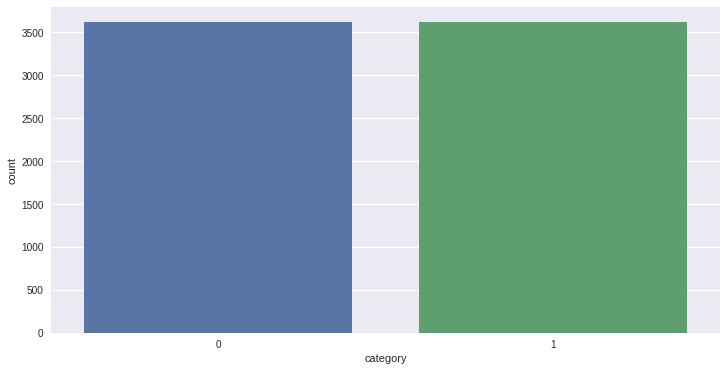

In [13]:
plt.figure(figsize=(12,6))
sns.countplot(data = df.sort_values(by='category'), x ='category')
plt.show()

In [14]:
from sklearn.model_selection import train_test_split

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
train_data, test_valid_data = train_test_split(df, test_size=0.2, random_state = 42, shuffle=True, stratify=df['category'])
train_data = train_data.reset_index(drop=True)
test_valid_data = test_valid_data.reset_index(drop=True)

In [16]:
test_data, valid_data = train_test_split(test_valid_data, test_size=0.5, random_state = 42,
                                         shuffle=True, stratify=test_valid_data['category'])
test_data = test_data.reset_index(drop=True)
valid_data = valid_data.reset_index(drop=True)

In [17]:
# take a random sample from the data
sample_images = train_data.sample(12)["filename"]

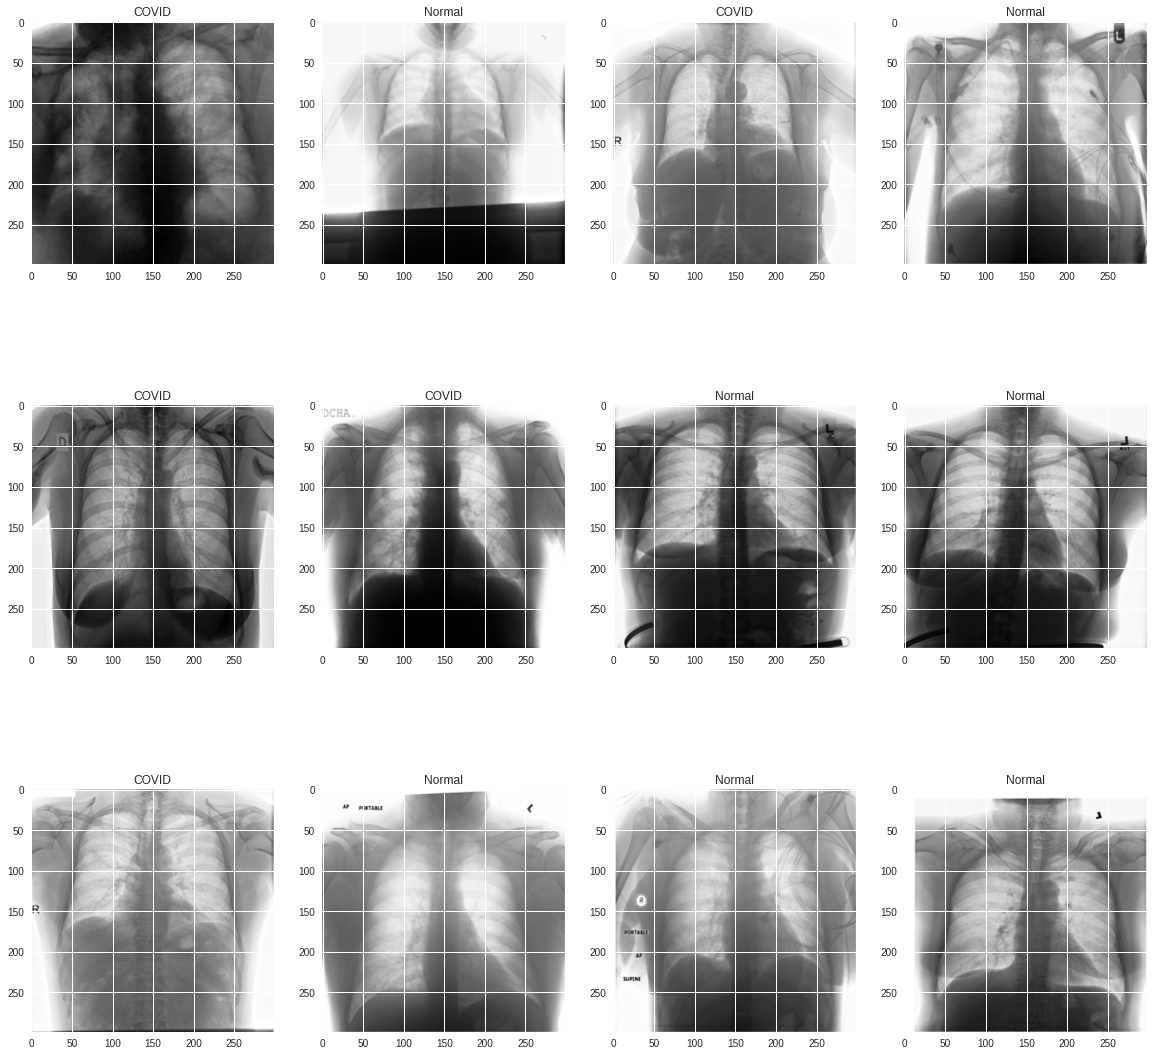

In [18]:
plt.figure(figsize=(20,20))
for i,path in enumerate(sample_images) :
    plt.subplot(3,4,i+1)
    plt.imshow(plt.imread(path))
    plt.title(path.split("/")[-1].split("-")[0]) 

In [34]:
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5"